In [55]:
%matplotlib inline
%config IPCompleter.greedy=True

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Each image is 28 pixels in height and 28 pixels in width
# total of 784 pixels

In [3]:
test = pd.read_csv("../../data/digitrecognizer/test.csv")
train = pd.read_csv("../../data/digitrecognizer/train.csv")

In [4]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(None, None)

In [5]:
# split label and feature data
train_labels = (train['label'])
train_features = (train.iloc[:, 1:].values).astype('float32')
test_features = (test.values).astype('int32')

In [6]:
# reshape into pixel dimensions and 1 column for gray scale
train_features = train_features.reshape(train_features.shape[0], 28, 28, 1)
test_features = test_features.reshape(test_features.shape[0], 28, 28, 1)
train_features.shape, test_features.shape, train_labels.shape

((42000, 28, 28, 1), (28000, 28, 28, 1), (42000,))

In [7]:
# display sample digits 
for i in range(16, 7):
    plt.subplot(330 + (i+1))
    plt.imshow(train_features[i], cmap=plt.get_cmap('gray'))
    plt.title(train_labels[i]);

plt.show()

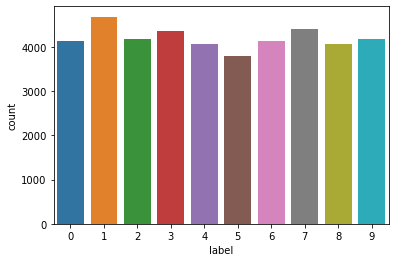

In [8]:
g = sns.countplot(train_labels)

In [9]:
# normalisation of the data so its between 0 and 1
train_features = train_features.astype('float32')/255.
test_features = test_features.astype('float32')/255.

In [10]:
# convert the target labels to categorical 
train_labels = to_categorical(train_labels)
train_labels.shape

In [11]:
# Check the data distribution
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns = train_features.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns = train_features.columns)

sns.jointplot(pos_df['V5'], pos_df['V6'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['V5'], neg_df['V6'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))
_ = plt.suptitle("Negative distribution")

(42000, 10)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.10, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

In [66]:
# setup the basic CNN
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), 
                    activation='relu', 
                    input_shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [67]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4),metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

In [ ]:
# fit the model 
batch_size = 128
num_classes = 10
epochs = 20

history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_val, y_val))

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 32s 840us/sample - loss: 0.0421 - acc: 0.9872 - val_loss: 0.0368 - val_acc: 0.9888
Epoch 2/20
37800/37800 [==============================] - 31s 825us/sample - loss: 0.0407 - acc: 0.9870 - val_loss: 0.0365 - val_acc: 0.9881
Epoch 3/20
37800/37800 [==============================] - 32s 840us/sample - loss: 0.0381 - acc: 0.9881 - val_loss: 0.0374 - val_acc: 0.9883
Epoch 4/20
37800/37800 [==============================] - 37s 968us/sample - loss: 0.0356 - acc: 0.9891 - val_loss: 0.0364 - val_acc: 0.9881
Epoch 5/20
37800/37800 [==============================] - 36s 948us/sample - loss: 0.0332 - acc: 0.9891 - val_loss: 0.0327 - val_acc: 0.9890
Epoch 6/20
37800/37800 [==============================] - 35s 922us/sample - loss: 0.0324 - acc: 0.9892 - val_loss: 0.0313 - val_acc: 0.9900
Epoch 7/20
10624/37800 [=======>......................] - ETA: 24s - loss: 0.0312 - acc: 0.9898

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_val, y_val, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
history_dict = history.history

In [ ]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# If Model Validates then retrain on whole training set

In [ ]:
# Re-train on the full data set before submitting 
history_final = model.fit(train_features, train_labels
              batch_size=batch_size,
              epochs=epochs,
              verbose=1)

In [ ]:
predict=model.predict(test_features, verbose=1)
print(predict)

In [ ]:
result=pd.DataFrame({'ImageId': list(range(1,len(predict)+1)),
                         'Label': predict})

In [18]:
result.to_csv('DSKsubmission.csv', index=False)

NameError: name 'sub' is not defined

In [ ]:
sub